# Regional Dynamics of Football Fan Engagement in Brazil: A Comparative Analysis of Flamengo's Popularity in Pernambuco and Ceara

#### This project analyzes Flamengo's varying popularity in the northeastern Brazilian states of Pernambuco and Ceara. Despite Flamengo being based in Rio de Janeiro, the club has a significant fanbase in Ceara while encountering relatively less support in Pernambuco. Through an analysis of search trends and other relevant data, this project aims to show that difference and understand the reasons behind this regional disparity in fan engagement.

#### Importing the necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import seaborn as sns

#### Reading data

In [4]:
ceara = pd.read_csv("ceara.csv", header=1) # remove the first unuseful line
ceara.head()

,Mês,Flamengo: (Ceará),Fortaleza Esporte Clube: (Ceará),Ceará Sporting Club: (Ceará)
0,2004-01,0,0,20
1,2004-02,0,0,19
2,2004-03,0,0,22
3,2004-04,5,7,21
4,2004-05,3,3,23


In [5]:
pernambuco = pd.read_csv("pernambuco.csv", header=1)
pernambuco.head(25)

,Mês,Santa Cruz Futebol Clube: (Pernambuco),Sport Club do Recife: (Pernambuco),Clube de Regatas do Flamengo: (Pernambuco),Clube Náutico Capibaribe: (Pernambuco)
0,2004-01,0,0,0,0
1,2004-02,0,0,0,0
2,2004-03,0,0,0,0
3,2004-04,0,0,0,0
4,2004-05,0,0,0,0
5,2004-06,0,0,0,0
6,2004-07,0,0,6,14
7,2004-08,0,0,0,0
8,2004-09,0,0,0,0
9,2004-10,0,7,0,0


##### Note that the pernambuco's data is very incosistent in the years 2004 and 2005. So I'll remove these two years from both datasets in order to avoid issues

#### Removing 2004 and 2005

In [6]:
ceara = ceara[ceara["Mês"] >= "2006-01"]
ceara.head()

,Mês,Flamengo: (Ceará),Fortaleza Esporte Clube: (Ceará),Ceará Sporting Club: (Ceará)
24,2006-01,5,4,23
25,2006-02,4,5,19
26,2006-03,3,4,20
27,2006-04,3,6,19
28,2006-05,6,4,15


In [7]:
pernambuco = pernambuco[pernambuco["Mês"] >= "2006-01"]
pernambuco.head()

,Mês,Santa Cruz Futebol Clube: (Pernambuco),Sport Club do Recife: (Pernambuco),Clube de Regatas do Flamengo: (Pernambuco),Clube Náutico Capibaribe: (Pernambuco)
24,2006-01,0,3,5,2
25,2006-02,0,2,4,2
26,2006-03,2,3,2,2
27,2006-04,1,6,3,4
28,2006-05,2,4,3,3


#### Cleaning data and renaming columns

In [8]:
# cleaning data

ceara["Mês"] = pd.to_datetime(ceara["Mês"])
pernambuco["Mês"] = pd.to_datetime(pernambuco["Mês"])

ceara.set_index("Mês", inplace=True)
ceara.columns = ["Clube de Regatas do Flamengo", "Fortaleza Esporte Clube", "Ceará Sporting Club"]

pernambuco.set_index("Mês", inplace=True)
pernambuco.columns = ["Santa Cruz Futebol Clube", "Sport Club do Recife", "Clube de Regatas do Flamengo", "Clube Náutico Capibaribe"]
pernambuco.head()

,Santa Cruz Futebol Clube,Sport Club do Recife,Clube de Regatas do Flamengo,Clube Náutico Capibaribe
Mês,,,,
2006-01-01,0,3,5,2
2006-02-01,0,2,4,2
2006-03-01,2,3,2,2
2006-04-01,1,6,3,4
2006-05-01,2,4,3,3


#### Turning the numbers in the datasets into the % of search instead of numbers that do not make sense

In [9]:
# creating a sum column
ceara["Soma"] = ceara[["Clube de Regatas do Flamengo", "Fortaleza Esporte Clube", "Ceará Sporting Club"]].sum(axis=1)
pernambuco["Soma"] = pernambuco[["Santa Cruz Futebol Clube", "Sport Club do Recife", "Clube de Regatas do Flamengo", "Clube Náutico Capibaribe"]].sum(axis=1)

for df in [ceara, pernambuco]:
    for col in df.columns:
        df[col] = df[col] / df["Soma"] * 100 
    df.drop("Soma", axis=1, inplace=True) # removing the sum column

ceara.head()

,Clube de Regatas do Flamengo,Fortaleza Esporte Clube,Ceará Sporting Club
Mês,,,
2006-01-01,15.625000,12.500000,71.875000
2006-02-01,14.285714,17.857143,67.857143
2006-03-01,11.111111,14.814815,74.074074
2006-04-01,10.714286,21.428571,67.857143
2006-05-01,24.000000,16.000000,60.000000


#### Creating a plot showing the search trend between each club from Ceara and Flamengo over the years

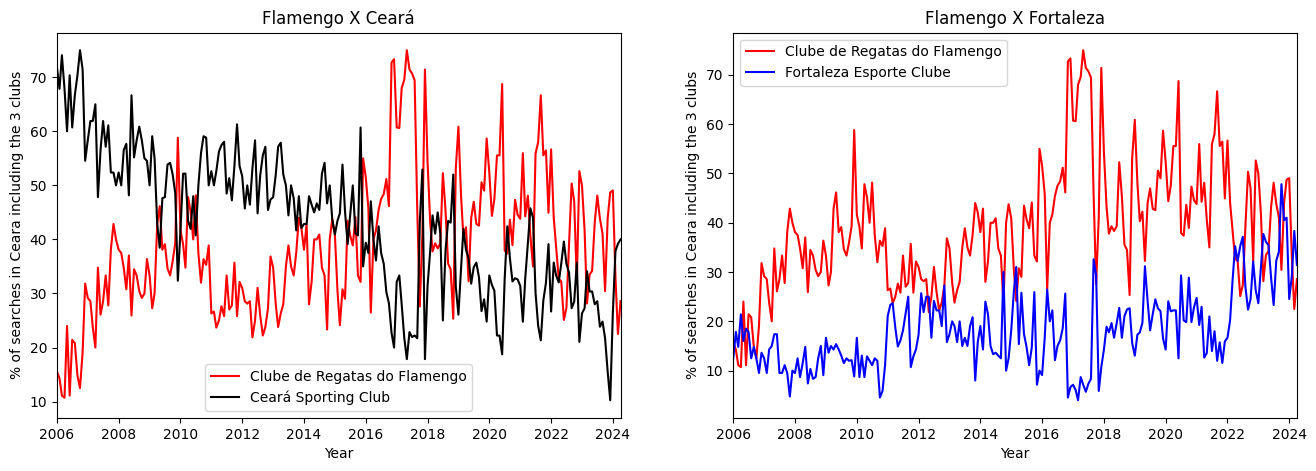

In [10]:
ceara_flamengo = ceara.drop("Fortaleza Esporte Clube", axis=1) # creating a df with only ceara and flamengo
fortaleza_flamengo = ceara.drop("Ceará Sporting Club", axis=1) # creating a df with only fortaleza and flamengo
plt.figure(figsize=(16, 5))

# setting the min and max dates
min_date = min(ceara_flamengo.index.min(), fortaleza_flamengo.index.min())
max_date = max(ceara_flamengo.index.max(), fortaleza_flamengo.index.max())

plt.subplot(1, 2, 1)
plt.plot(ceara_flamengo["Clube de Regatas do Flamengo"], label="Clube de Regatas do Flamengo", color='red') # flamengo will be color red
plt.plot(ceara_flamengo["Ceará Sporting Club"], label="Ceará Sporting Club", color='black') # ceara will be color black
plt.title("Flamengo X Ceará")
plt.xlabel("Year")
plt.ylabel("% of searches in Ceara including the 3 clubs") # the values will not sum 100%
plt.legend(ceara_flamengo.columns)
plt.xlim(min_date, max_date) # in order to avoid unecessary whitespace

plt.subplot(1, 2, 2)
plt.plot(fortaleza_flamengo["Clube de Regatas do Flamengo"], label="Clube de Regatas do Flamengo", color='red') # flamengo will be color red
plt.plot(fortaleza_flamengo["Fortaleza Esporte Clube"], label="Fortaleza Esporte Clube", color='blue') # fortaleza will be color blue
plt.title("Flamengo X Fortaleza")
plt.xlabel("Year")
plt.ylabel("% of searches in Ceara including the 3 clubs") # the values will not sum 100%
plt.legend(fortaleza_flamengo.columns)
plt.xlim(min_date, max_date); # in order to avoid unecessary whitespace

# it is important to plot the columns one at time in order to specify its color, if it weren't for this, the colors would be blue and orange on both plots,
# making difficult to differentiate fortaleza and ceara which would have the same color

#### Creating a plot showing the search trend between each club from Pernambuco and Flamengo over the years

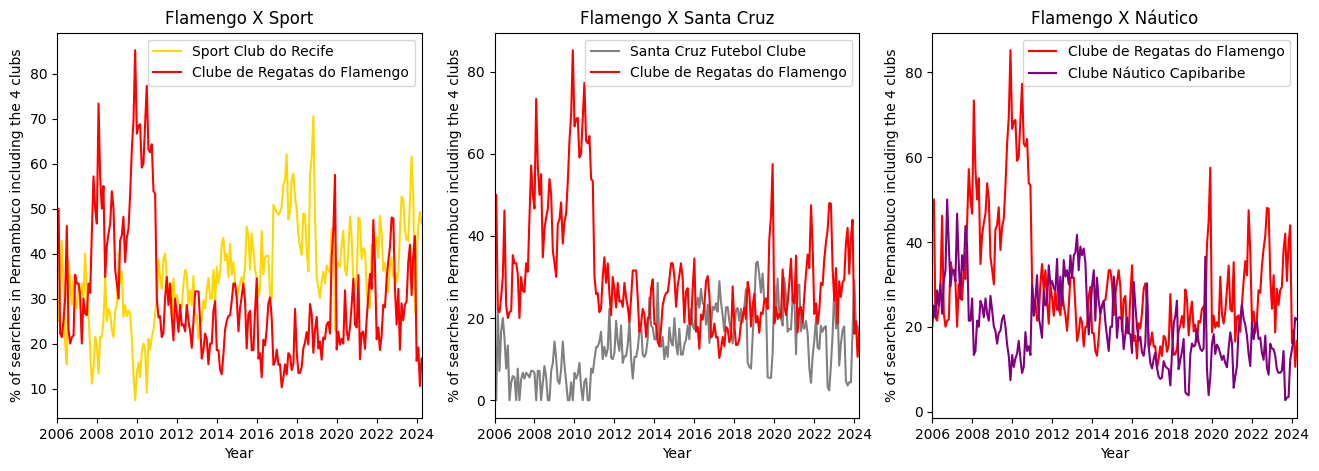

In [11]:
sport_flamengo = pernambuco.drop(["Clube Náutico Capibaribe", "Santa Cruz Futebol Clube"], axis=1) # df with only sport and flamengo
santa_flamengo = pernambuco.drop(["Sport Club do Recife", "Clube Náutico Capibaribe"], axis=1) # df with only santa cruz and flamengo
nautico_flamengo = pernambuco.drop(["Sport Club do Recife", "Santa Cruz Futebol Clube"], axis=1) # df with only nautico and flamengo

min_date = min(sport_flamengo.index.min(), santa_flamengo.index.min(), nautico_flamengo.index.min())
max_date = max(sport_flamengo.index.max(), santa_flamengo.index.max(), nautico_flamengo.index.max())

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.plot(sport_flamengo["Sport Club do Recife"], label="Sport Club do Recife", color="gold")
plt.plot(sport_flamengo["Clube de Regatas do Flamengo"], label="Clube Regatas do Flamengo", color="red")
plt.title("Flamengo X Sport")
plt.xlabel("Year")
plt.ylabel("% of searches in Pernambuco including the 4 clubs") # the sum wont be 100%
plt.legend(sport_flamengo.columns)
plt.xlim(min_date, max_date) # in order to avoid unecessary whitespace

plt.subplot(1, 3, 2)
plt.plot(santa_flamengo["Santa Cruz Futebol Clube"], label="Santa Cruz Futebol Clube", color="grey")
plt.plot(santa_flamengo["Clube de Regatas do Flamengo"], label="Clube Regatas do Flamengo", color="red")
plt.title("Flamengo X Santa Cruz")
plt.xlabel("Year")
plt.ylabel("% of searches in Pernambuco including the 4 clubs")
plt.legend(santa_flamengo.columns)
plt.xlim(min_date, max_date)

plt.subplot(1, 3, 3)
plt.plot(nautico_flamengo["Clube de Regatas do Flamengo"], label="Clube Regatas do Flamengo", color="red")
plt.plot(nautico_flamengo["Clube Náutico Capibaribe"], label="Clube Náutico Capibaribe", color="purple")
plt.title("Flamengo X Náutico")
plt.xlabel("Year")
plt.ylabel("% of searches in Pernambuco including the 4 clubs")
plt.legend(nautico_flamengo.columns)
plt.xlim(min_date, max_date);

# observation: the color of each club in the plots should be considering at least a color they use on their crest, but this was not possible for nautico,
# they use only red (already taken by flamengo) and white (which wouldnt appear in the plot), so I made the decision to put it in purple in order to make it
# easy to differentiate between both clubs

##### Maybe it would have been better if the plots were bars, but the goal of these plots is just to visualize what are the clubs' trends and, consequently, their popularity in their respective state when compared to Flamengo. With these line plots, it is possible to draw a conclusion that Flamengo crearly have is more popular in Ceara, with rising trends, then in Pernambuco, state in which the club the trend is falling, with less than 20% of the state total searches in the year of 2024. Therefore, it is crucial to analyze what reasons lead to this reality, be they geographic, economical, political or other.

#### Load of data that will be used. Observation: the cities near the capital and far from the capital were based on data of the IBGE (Brazilian Institute of Geography and Statistics)and I tried to consider about the same number of cities in both criteria

In [22]:
# Human Development Index (HDI) per city
idhm_pe = pd.read_csv("idhm_pe.csv")
idhm_ce = pd.read_csv("idhm_ce.csv")

# the results of the search, but now for each city
trends_cities_pe = pd.read_csv("trends_cities_pe.csv", header=1).dropna()
trends_cities_ce = pd.read_csv("trends_cities_ce.csv", header=1).dropna()

# cities near the capital of both states
cities_capital_pe = ["Abreu e Lima", "Araçoiaba", "Cabo de Santo Agostinho", "Camaragibe", "Igarassu", "Ilha de Itamaracá",
                     "Ipojuca", "Itapissuma", "Jaboatão dos Guararapes", "Moreno", "Olinda", "Paulista", "Recife",
                     "São Lourenço da Mata"]
cities_capital_ce = ["Aquiraz", "Cascavel", "Caucaia", "Chorozinho", "Eusébio", "Fortaleza", "Guaiúba", "Horizonte",
                     "Itaitinga", "Maracanaú", "Maranguape", "Pacajus", "Pacatuba", "Pindoretama", "São Gonçalo do Amarante",
                     "São Luís do Curu", "Paraipaba", "Paracuru", "Trairi"]

# cities far from the capital of both states
cities_country_pe = ["Serra Talhada", "Araripina", "Arcoverde", "Ouricuri", "Salgueiro", "Bodocó", "Afogados da Ingazeira",
                     "Petrolândia", "Sertânia", "São José do Belmonte", "São José do Egito", "Exu"]
cities_country_ce = ["Barbalha", "Carto", "Jardim", "Juazeiro do Norte", "Missão Velha", "Nova Olinda", "Porteiras",
                     "Santana do Cariri", "Abaiara", "Brejo Santo", "Jaiti", "Milagres", "Penaforte"]

# HDI classification according to the United Nations
idhm_classification = {
    "Very high": [0.8, 1],
    "High": [0.7, 0.8],
    "Medium": [0.55, 0.7],
    "Low": [0, 0.55]
}
idhm_pe.head()

,Posicao,Municípios,IDHM,IDHM Renda,IDHM Longevidade,IDHM Educação
0,1,Fernando de Noronha,0.788,0.781,0.839,0.748
1,2,Recife,0.772,0.798,0.825,0.698
2,3,Olinda,0.735,0.704,0.836,0.675
3,4,Paulista,0.732,0.673,0.830,0.703
4,5,Jaboatão dos Guararapes,0.717,0.692,0.830,0.642


#### Cleaning this data

In [23]:
idhm_pe = idhm_pe[["Posicao", "Municípios", "IDHM"]] # selecting the desired columns
idhm_pe.set_index("Posicao", inplace=True)

idhm_ce.rename({"Municipios": "Municípios", "Posicao no Estado": "Posicao"}, axis=1, inplace=True) # renaming the columns
idhm_ce.set_index("Posicao", inplace=True)
idhm_ce.head()

,Municípios,IDHM
Posicao,,
1,Fortaleza,0.754
2,Sobral,0.714
3,Crato,0.713
4,Eusébio,0.701
5,Juazeiro do Norte,0.694


#### More cleaning

In [24]:
for df in [trends_cities_ce, trends_cities_pe]:
    df.set_index("Cidade", inplace=True)
    df.replace("%", "", regex=True, inplace=True)

trends_cities_ce.columns = ["Clube de Regatas do Flamengo", "Ceará Sporting Club", "Fortaleza Esporte Clube"]
trends_cities_pe.columns = ["Santa Cruz Futebol Clube", "Sport Club do Recife", "Clube de Regatas do Flamengo", "Clube Náutico Capibaribe"]

trends_cities_pe.head()

,Santa Cruz Futebol Clube,Sport Club do Recife,Clube de Regatas do Flamengo,Clube Náutico Capibaribe
Cidade,,,,
Itapissuma,23,45,19,13
Paulista,23,49,11,17
Olinda,23,51,9,17
Camaragibe,24,50,10,16
Ilha de Itamaracá,22,48,15,15


### To be continued next week!!! (Apr 12)